# Python para Ciencias de Datos : Introducción a Numpy y Pandas
![](./imagenes/chattigo.png)


## Python

Python es un lenguaje de programación:

* Interpretado e Interactivo
* De propósito general
* Fácil de aprender, programar y **leer** (menos *bugs*)
* Orientado a objetos
* Tipado dinámico
* De *muy alto nivel*
* Multiparadigma
* Libre y con licencia permisiva
* Eficiente
* Versátil y potente! 
* Con gran documentación
* Y una gran comunidad de usuarios

Python reúne las características necesarias para Data Science, además de ser un buen lenguaje de programación de uso general.

Python dispone de un rico ecosistema compuesto de librerías opensource para matemáticas, estadisticas, machine learning y ciencia en general.
- Numpy
- SciPy
- Matplotlib
- Pandas

#### Ipython Notebook (Jupyter)



Una forma muy útil es usar Python es mediante los *Notebooks*. Jupyter es un entorno web para computación interactiva. 


Podemos crear y editar "celdas" de código Python que podés editar y volver a ejecutar, podés intercalar celdas de texto, fórmulas matemáticas, y hacer que gráficos se muestren inscrutados en la misma pantalla. Estos archivos se guardan con extensión *.ipynb*, que pueden exportarse a diversos formatos estátucos como html o como código python puro. (.py)

Los notebooks son muy útiles para la **"programación exploratoria"**, muy frecuente en ciencia e ingeniería


## Numpy, todo es un array

El paquete **numpy** es usado en casi todos los cálculos numéricos usando Python. Es un paquete que provee a Python de estructuras de datos vectoriales, matriciales y de rango mayor, de alto rendimiento. Está implementado en C y Fortran, de modo que cuando los cálculos son vectorizados (formulados con vectores y matrices), el rendimiento es muy bueno.

In [1]:
import numpy as np

El pilar de numpy (y toda la computación científica basada en Python) es el tipo de datos `ndarray`, o sea arreglos de datos multidimensionales.

¿Otra secuencia más? ¿pero que tenían de malo las listas?

Las listas son geniales paro guardar **cualquier tipo de objeto**, pero esa flexibilidad las vuelve ineficientes cuando lo que queremos es almacenar datos homogéneos

In [2]:
%timeit [0.1*i for i in range(10000)]

504 µs ± 7.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%timeit np.arange(0, 10000, .1)  

391 µs ± 835 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%%timeit -o
X = range(10000000)
Y = range(10000000)
Z = [(x + y) for x,y in zip(X,Y)]

764 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 764 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [5]:
%%timeit -o
X = np.arange(10000000)
Y = np.arange(10000000)
Z = X + Y

50.7 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 50.7 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [6]:
__.best / _.best

15.085861718955655

Existen varias formas para inicializar nuevos arrays de numpy, por ejemplo desde

- Listas o tuplas
- Usando funciones dedicadas a generar arreglos numpy, como `arange`, `linspace`, `ones`, `zeros` etc.
- Leyendo datos desde archivos

In [7]:
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [8]:
# una matriz: el argumento de la función array function es una lista anidada de Python
M = np.array([[1, 2],
              [3, 4.0]])
M

array([[1., 2.],
       [3., 4.]])

In [9]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

### Dimensiones, tamaño, tipo, forma

Los ndarrays tienen distintos atributos. Por ejemplo

In [10]:
v.ndim, M.ndim    # cantidad de dimensiones

(1, 2)

In [11]:
v.shape, M.shape  # tupla de "forma". len(v.shape) == v.ndim

((4,), (2, 2))

In [12]:
v.size, M.size   # cantidad de elementos.

(4, 4)

In [13]:
M.T   # transpuesta!

array([[1., 3.],
       [2., 4.]])

A diferencia de las listas, los *arrays* tambien **tienen un tipo homogéneo**

In [14]:
v.dtype, M.dtype    #

(dtype('int64'), dtype('float64'))

Se puede definir explicitamente el tipo de datos del array

In [15]:
np.array([[1, 2], [3, 4]], dtype=complex)

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Una gran ventaja del atributo `shape` es que podemos cambiarlo. Es decir, reacomodar la distrución de los elementos (por supuesto, sin perderlos en el camino)

In [16]:
A = np.arange(0, 12)
A.shape

(12,)

In [17]:
A.shape = 3, 4
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

El método `reshape` es otra manera de definir la forma de un array, generando uno nuevo array (a diferencia de `A.shape` que simplemente es otra vista del mismo array)

In [18]:
A = np.arange(12).reshape((3,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Vistas

Esto es porque numpy en general no mueve los elementos de la memoria y en cambio usa **vistas** para mostrar los elementos de distinta forma. Es importante entender esto porque incluso los slicings son vistas.

In [19]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
a = np.arange(10)
b = a[::2]  # todo de 2 en 2
b

array([0, 2, 4, 6, 8])

In [21]:
b[0] = 12
a  # chan!!!

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

En cambio

In [22]:
c = np.arange(10)
d = c[::2].copy()
d[0] = 12
c

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Una forma de saber si un array es "base" o hereda los datos de otro array (es una vista), es verificar el atributo `base`

In [23]:
b.base is a and a.base is None

True

### Otras funciones constructuras de arrays


Además de `arange` hay otras funciones que devuelven arrays. Por ejemplo `linspace`, que a diferencia de `arange` no se da el tamaño del paso, sino la cantidad de puntos que queremos en el rango

In [24]:
np.linspace(0, 2 * np.pi, 100)      # por defecto, incluye el limite.

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [25]:
_.size   # en cualquier consola, python guarda el ultimo output en la variable _

100

In [26]:
matriz_de_ceros = np.zeros((4,6))
matriz_de_ceros

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [27]:
np.ones((2, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

# Pandas

### Qué es pandas?

Pandas es una librería de Python que provee un conjunto de estructuras para manipular datos y ejecutar varios análisis financieros y estadísticos.

In [28]:
 import pandas as pd

Las dos estructuras primarias que existen en Pandas son:

*   Series
*   DataFrames


### ¿Qué son las Series?

Representa a un arreglo unidimensional basado en un arreglo Numpy de tipo ndarray. Las Series extienden la funcionalidad provista por el ndarray de Numpy ya que estas añaden un conjunto de etiquetas (nombres de columnas) que son usadas para indexar los elementos.

Una Serie puede ser creada al recibir como parámetro un valor escalar, un arreglo de Numpy o un diccionario/lista de Python.

Creamos una Serie de una distribución normal de 50 números aleatorios, con  **seed** obtenemos los mismos valores en el array independientemente de las veces que ejecutemos el método randn. 


In [29]:
np.random.seed(1)

In [30]:
serie1 = pd.Series(np.random.randn(50))

In [31]:
serie1

0     1.624345
1    -0.611756
2    -0.528172
3    -1.072969
4     0.865408
5    -2.301539
6     1.744812
7    -0.761207
8     0.319039
9    -0.249370
10    1.462108
11   -2.060141
12   -0.322417
13   -0.384054
14    1.133769
15   -1.099891
16   -0.172428
17   -0.877858
18    0.042214
19    0.582815
20   -1.100619
21    1.144724
22    0.901591
23    0.502494
24    0.900856
25   -0.683728
26   -0.122890
27   -0.935769
28   -0.267888
29    0.530355
30   -0.691661
31   -0.396754
32   -0.687173
33   -0.845206
34   -0.671246
35   -0.012665
36   -1.117310
37    0.234416
38    1.659802
39    0.742044
40   -0.191836
41   -0.887629
42   -0.747158
43    1.692455
44    0.050808
45   -0.636996
46    0.190915
47    2.100255
48    0.120159
49    0.617203
dtype: float64

Cada uno de los elementos de una serie puede ser accedido mediante el uso del operador  []. Por ejemplo si queremos acceder al elemento 5  de nuestra serie podemos hacerlo de la siguiente manera: 

In [32]:
serie1[5]

-2.3015386968802827

Para acceder a múltiples valores se puede utilizar un arreglo de valores.

In [33]:
serie1[[1, 3, 5]]

1   -0.611756
3   -1.072969
5   -2.301539
dtype: float64

Así como en Numpy era posible usar el operador  (:) para seleccionar uno o más elementos del arreglo, también tenemos esa funcionalidad en Pandas.

 * Seleccionar desde el elemento 1 al elemento 5


In [34]:
serie1[1:5]

1   -0.611756
2   -0.528172
3   -1.072969
4    0.865408
dtype: float64

* Mostrar los 5 primeros elementos de la serie. Para esto vamos a utilizar la función head


In [35]:
serie1.head()

0    1.624345
1   -0.611756
2   -0.528172
3   -1.072969
4    0.865408
dtype: float64

* 
    Mostrar los 5 últimos elementos. Para esto vamos a utilizar la función tail


In [36]:
serie1.tail()

45   -0.636996
46    0.190915
47    2.100255
48    0.120159
49    0.617203
dtype: float64

### ¿Qué es un DataFrame en Pandas?

Mientras que en las series tenemos arreglos unidimensionales, para el caso de un DataFrame podemos verlo como un arreglo de múltiples series en el cual cada serie es una columna del DataFrame. También puede verse a un DataFrame como una tabla en una base de datos.

  *  Crear un DataFrame de un arreglo Numpy de dos dimensiones


In [37]:
pd.DataFrame(np.array([[1, 2], [3, 4]]))

,0,1
0,1,2
1,3,4


* Crear un DataFrame de una Serie

In [38]:
dataFrame1 = pd.DataFrame([pd.Series(np.arange(1, 5))])
dataFrame1

,0,1,2,3
0,1,2,3,4


El nombre de las columnas del DataFrame pueden ser definidas en el momento de su creación mediante el constructor del DataFrame.

   * Crear el DataFrame df con dos columnas de nombre columnaA y columnaB


In [39]:
df = pd.DataFrame(np.array([[1,"a"], [2, "b"]]),columns=["columnaA", "columnaB"])

El nombre de las columnas del DataFrame pueden ser accesadas con el siguiente comando:

In [40]:
df.columns

Index(['columnaA', 'columnaB'], dtype='object')

### Seleccionar columnas del DataFrame

Para seleccionar elementos en el DataFrame vamos a utilizar el operador []. Por ejemplo podemos seleccionar la columnaA

In [41]:
df[["columnaA"]]

,columnaA
0,1
1,2


Seleccionar la columnaA y columnaB del DataFrame. Para este caso debemos pasar como parámetro una lista para lo cual debemos usar [[]]

In [42]:
df[["columnaA","columnaB"]]

,columnaA,columnaB
0,1,a
1,2,b


Las columnas pueden también ser invocadas usando el punto y a continuación el nombre de la columna. Por ejemplo:

In [43]:
df.columnaA

0    1
1    2
Name: columnaA, dtype: object

### Selección de valores únicos en el DataFrame

Para acceder a un elemento específico del Dataframe df podemos hacerlo usando el atributo iat.

 *   Acceder al elemento de la primera fila y primera columna mediante el siguiente atributo iat . Recordemos que en los arreglos empezamos siempre desde el índice cero


In [44]:
df.iat[0,0]

'1'

En el caso que deseemos especificar el nombre de la columna utilizaremos el atributo at.

In [45]:
 df.at[0,"columnaA"]

'1'

### Seleccionar filas usando selección booleana

Se pueden seleccionar filas usando condiciones lógicas a los valores de cualquier columna. Se podría utilizar esta funcionalidad para obtener todos los estudiantes cuya edad es menor que 18. Por ejemplo:

Primero creamos un DataFrame con los datos de estudiantes. Más adelante veremos lo que debemos hacer para  ingresar esta información desde archivos de tipo texto.

In [46]:
estudiante = pd.DataFrame(np.array([["Carlos Torres", 15], ["Juan Borja",21],["Pablo Cuevas",25]]),columns=["nombre", "edad"])

Para evitar un error al comparar el campo edad, que está definido como string, con un integer, que es el valor numérico que definiremos al hacer la comparación  (**TypeError**: ‘>’ not supported between instances of ‘str’ and ‘int’) es necesario hacer un cast de la edad de string a integer mediante el atributo **astype**

In [47]:
estudiante["edad"] = estudiante["edad"].astype("int")

En este ejemplo, al usar el operador  > (mayor que) nos retornará un listado de valores booleanos (True, False). Si el valor en el array es menor al valor especificado retornará False y si el valor es mayor retornará True. 

In [48]:
 estudiante.edad < 18

0     True
1    False
2    False
Name: edad, dtype: bool

Para obtener únicamente las filas que cumplen este valor usaremos el siguiente comando:

In [49]:
estudiante[estudiante.edad > 18]

,nombre,edad
1,Juan Borja,21
2,Pablo Cuevas,25


### Aritmética en DataFrames

Una de las ventajas de realizar operaciones matemáticas con DataFrames es que son aplicadas a todas las filas y columnas. Por ejemplo: 

* Crear un DataFrame de 3 valores


In [50]:
dataFrame2 = pd.DataFrame([pd.Series(np.arange(1, 4))])

Multiplicar el dataFrame2 x 4

In [51]:
dataFrame2 * 4

,0,1,2
0,4,8,12


### Lectura y escritura de datos 

Pandas nos permite acceder y escribir  data en diferentes tipos de estructuras que pueden ser archivos o bases de datos.

En Pandas tenemos los siguientes comandos para escribir y acceder a archivos y bases de datos. 

En este tutorial se describe la lectura de datos desde archivos csv que es uno de los formatos más utilizados para el análisis de datos. En el transcurso de este blog iremos profundizando y utilizando más funcionalidades de Pandas.


|Tipo de Archivo |Lectura |Escritura|
|---|---|---|
|CSV |read_csv |to_csv|
|Excel |read_excel |to_excel|
|HDF (Hierarchical Data Format) |read_hdf |to_hdf|
|SQL |read_sql |to_sql|
|JSON |read_json |to_json|
|HTML |read_html |to_html|
|STATA |read_stata |to_stata|
|-- |read_clipboard |to_clipboard|
| -- |read_pickle |to_pickle|

In [52]:
df = pd.read_csv("./Educational_Attainment.csv")

In [53]:
df.head()

,Geography,Geography type,Year,Less Than High School Graduate,High School Graduate,Some College or Associate's Degree,Bachelor's Degree or Higher,Location 1
0,Atherton,Town,01/01/2014 12:00:00 AM,13.6,12.3,2.7,3.5,"(37.458611, -122.2)"
1,Colma,Town,01/01/2014 12:00:00 AM,6.3,6.4,10.4,2.4,"(37.678889, -122.455556)"
2,Foster City,City,01/01/2014 12:00:00 AM,11.9,9.7,2.0,2.9,"(37.551389, -122.266389)"
3,Portola Valley,Town,01/01/2014 12:00:00 AM,48.1,0.0,0.0,1.8,"(37.375, -122.218611)"
4,Redwood City,City,01/01/2014 12:00:00 AM,16.4,10.6,6.6,3.0,"(37.482778, -122.236111)"


## Análisis básico del conjunto de datos

pandas tiene varios métodos que le permiten analizar rápidamente un conjunto de datos y tener una idea del tipo y la cantidad de datos con los que está tratando junto con algunas estadísticas importantes.

* **.shape** - devuelve el recuento de filas y columnas de un conjunto de datos
* **.describe()** - devuelve estadísticas sobre las columnas numéricas en un conjunto de datos
* **.dtypes** devuelve el tipo de datos de cada columna

In [54]:
df.shape


(32, 8)

In [55]:
df.describe()

,Less Than High School Graduate,High School Graduate,Some College or Associate's Degree,Bachelor's Degree or Higher
count,32.00000,32.000000,32.000000,32.000000
mean,17.80000,6.462500,5.946875,2.856250
std,19.29944,4.693905,4.728430,1.873919
min,0.00000,0.000000,0.000000,0.000000
25%,6.82500,1.925000,2.525000,2.100000
50%,13.90000,7.750000,5.500000,3.000000
75%,20.97500,9.450000,8.800000,3.600000
max,100.00000,16.400000,18.500000,9.100000


También puedes ejecutar el método **.describe** con la bandera **"include='all'"** para obtener estadísticas sobre los tipos de columnas no numéricas.

Para poder manejar con mayor facilidad el DataFrame vamos a cambiar el nombre de las columnas

In [56]:
df = df.rename(
    columns = {
        col : '_'.join(col.lower().replace("\'","_").split( )) 
        for col in  list(df.columns)
    }
)

In [57]:
df.head(1)

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1
0,Atherton,Town,01/01/2014 12:00:00 AM,13.6,12.3,2.7,3.5,"(37.458611, -122.2)"


In [58]:
df.describe(include="all")

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1
count,32,32,32,32.00000,32.000000,32.000000,32.000000,32
unique,32,3,1,NaN,NaN,NaN,NaN,32
top,San Carlos,City,01/01/2014 12:00:00 AM,NaN,NaN,NaN,NaN,"(37.678889, -122.455556)"
freq,1,15,32,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,17.80000,6.462500,5.946875,2.856250,NaN
std,NaN,NaN,NaN,19.29944,4.693905,4.728430,1.873919,NaN
min,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,6.82500,1.925000,2.525000,2.100000,NaN
50%,NaN,NaN,NaN,13.90000,7.750000,5.500000,3.000000,NaN
75%,NaN,NaN,NaN,20.97500,9.450000,8.800000,3.600000,NaN


In [59]:
df.dtypes

geography                              object
geography_type                         object
year                                   object
less_than_high_school_graduate        float64
high_school_graduate                  float64
some_college_or_associate_s_degree    float64
bachelor_s_degree_or_higher           float64
location_1                             object
dtype: object

Aquí hay algunos métodos adicionales que pueden darle estadísticas de un DataFrame o una columna particular en un DataFrame.

*    .mean(axis=0 [te dará el valor calculado por columna]) - devuelve la media estadística
*    .median(axis=0 [te dará el valor calculado por columna]) - devuelve la mediana estadística
*    .mode(axis=0 [le dará el valor calculado por columna]) - devuelve el modo estadístico
*    .count() - da el número de valores totales en la columna
*    .unique() - devuelve una matriz de todos los valores únicos de esa columna
*    .value_counts() - devuelve un objeto que contiene recuentos de valores únicos


In [60]:
df.bachelor_s_degree_or_higher.mean()

2.85625

In [61]:
df.geography.count()

32

In [62]:
df.geography_type.unique()

array(['Town', 'City', 'CDP'], dtype=object)

In [63]:
df.less_than_high_school_graduate.value_counts()

0.0      4
14.2     1
8.5      1
7.0      1
100.0    1
9.5      1
11.9     1
4.8      1
31.1     1
26.7     1
6.2      1
15.7     1
22.1     1
16.4     1
6.3      1
44.4     1
20.9     1
7.7      1
9.2      1
37.8     1
3.3      1
15.1     1
48.1     1
18.3     1
21.2     1
16.1     1
13.6     1
13.4     1
20.1     1
Name: less_than_high_school_graduate, dtype: int64

### Funciones de mapeo para transformar los datos

A menudo necesitamos aplicar una función a una columna en un conjunto de datos para transformarla. pandas lo hace fácil de hacer con el método **.apply()**. En este ejemplo, mapearemos los valores de la columna **geography_type** a un "1" o un "0" dependiendo del valor. Añadiremos esta información al DataFrame en una nueva columna.

In [64]:
def mapGeography(x):
    if x == "City":
        return 1
    else:
        return 0

In [65]:
df['geography_mapped_value'] = df.geography_type.apply(mapGeography)

df.geography_mapped_value.value_counts()

0    17
1    15
Name: geography_mapped_value, dtype: int64

También podríamos haber logrado lo mismo en una función lambda de la siguiente manera

In [66]:
df['geography_mapped_value_lambda'] = df.geography_type.apply(lambda y: 1 if y == "City" else 0)

In [67]:
df.geography_mapped_value_lambda.value_counts()

0    17
1    15
Name: geography_mapped_value_lambda, dtype: int64

## Combinando datos en Pandas

Parte del poder de las Series y los DataFrame proviene de un enfoque multifacético para combinar conjuntos de datos separados. Con Pandas, puede fusionar, unir y concatenar sus conjuntos de datos, lo que le permite unificar y comprender mejor sus datos a medida que los analiza.

En este tutorial, aprenderá cómo y cuándo combinar sus datos en Pandas con:

*  .merge() para combinar datos en columnas o índices comunes
*  .join() para combinar datos en una columna clave o un índice
*  .concat() para combinar los DataFrames a través de filas o columnas

In [68]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

La función **pd.merge()** implementa varios tipos de uniones: la unión de uno a uno, de muchos a uno y de muchos a muchos. Se accede a los tres tipos de uniones mediante una llamada idéntica a la interfaz pd.merge(); el tipo de unión realizada depende de la forma de los datos de entrada.

### Uno a uno

Tal vez el tipo más simple de expresión de fusión es la unión uno a uno, que es en muchos aspectos muy similar a la concatenación por columnas 

In [69]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [70]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


La función **pd.merge()** reconoce que cada DataFrame tiene una columna de **"empleado"**, y se une automáticamente usando esta columna como clave.
El resultado de la fusión es un nuevo DataFrame que combina la información de las dos entradas. Tener en cuenta que la fusión en general descarta el índice, excepto en el caso especial de las fusiones por índice.


### Muchos a uno

Las uniones de muchos a uno son uniones en las que una de las dos columnas clave contiene entradas duplicadas. En el caso de las uniones de muchos a uno, el DataFrame resultante preservará esas entradas duplicadas según corresponda.

In [71]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### Muchos a muchos

Las uniones de muchos a muchos son un poco confusas conceptualmente, pero sin embargo están bien definidas. Si la columna clave en la matriz izquierda y derecha contiene duplicados, entonces el resultado es una fusión de muchos a muchos.

In [72]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


#### Opciones del Merger

1. especificar la llave
2. left_on y right_on
3. left_index y right_index
4. Tipos de uniones

### 1.

In [73]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### 2.

In [74]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')


df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [97]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### 3.

In [99]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [102]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [103]:
# merge que une por indices
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


### 3.1 Combinando los puntos 2. y 3.

In [104]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

### 4.

![](imagenes/charla.png)

In [106]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [107]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [108]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [109]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

### Visualización de datos con Plotly y Pandas

In [77]:
import matplotlib.pyplot as plt

In [78]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

Pandas tiene una estrecha integración con matplotlib.

Puede graficar datos directamente desde su DataFrame usando el método plot():

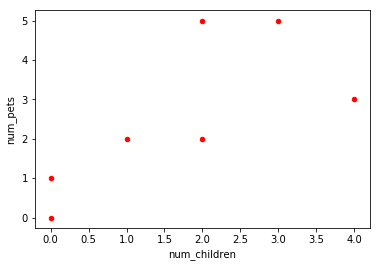

In [79]:
# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()


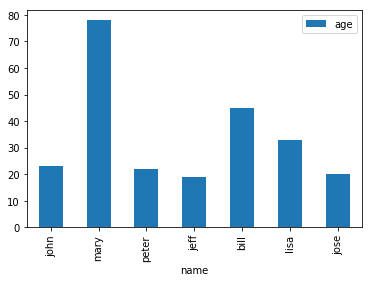

In [80]:
# a simple line plot
df.plot(kind='bar',x='name',y='age')

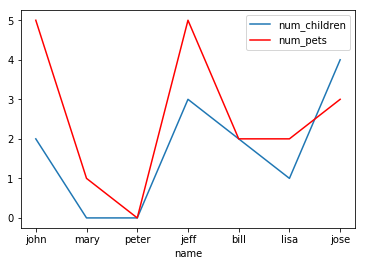

In [81]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

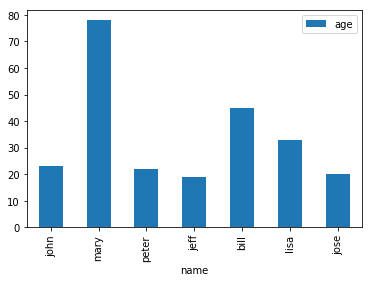

In [83]:

df.plot(kind='bar',x='name',y='age')
# the plot gets saved to 'output.png'
plt.savefig('output.png')

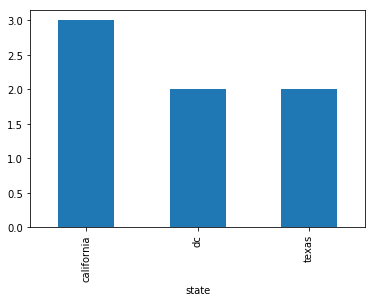

In [84]:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

# Preguntas